No handles with labels found to put in legend.


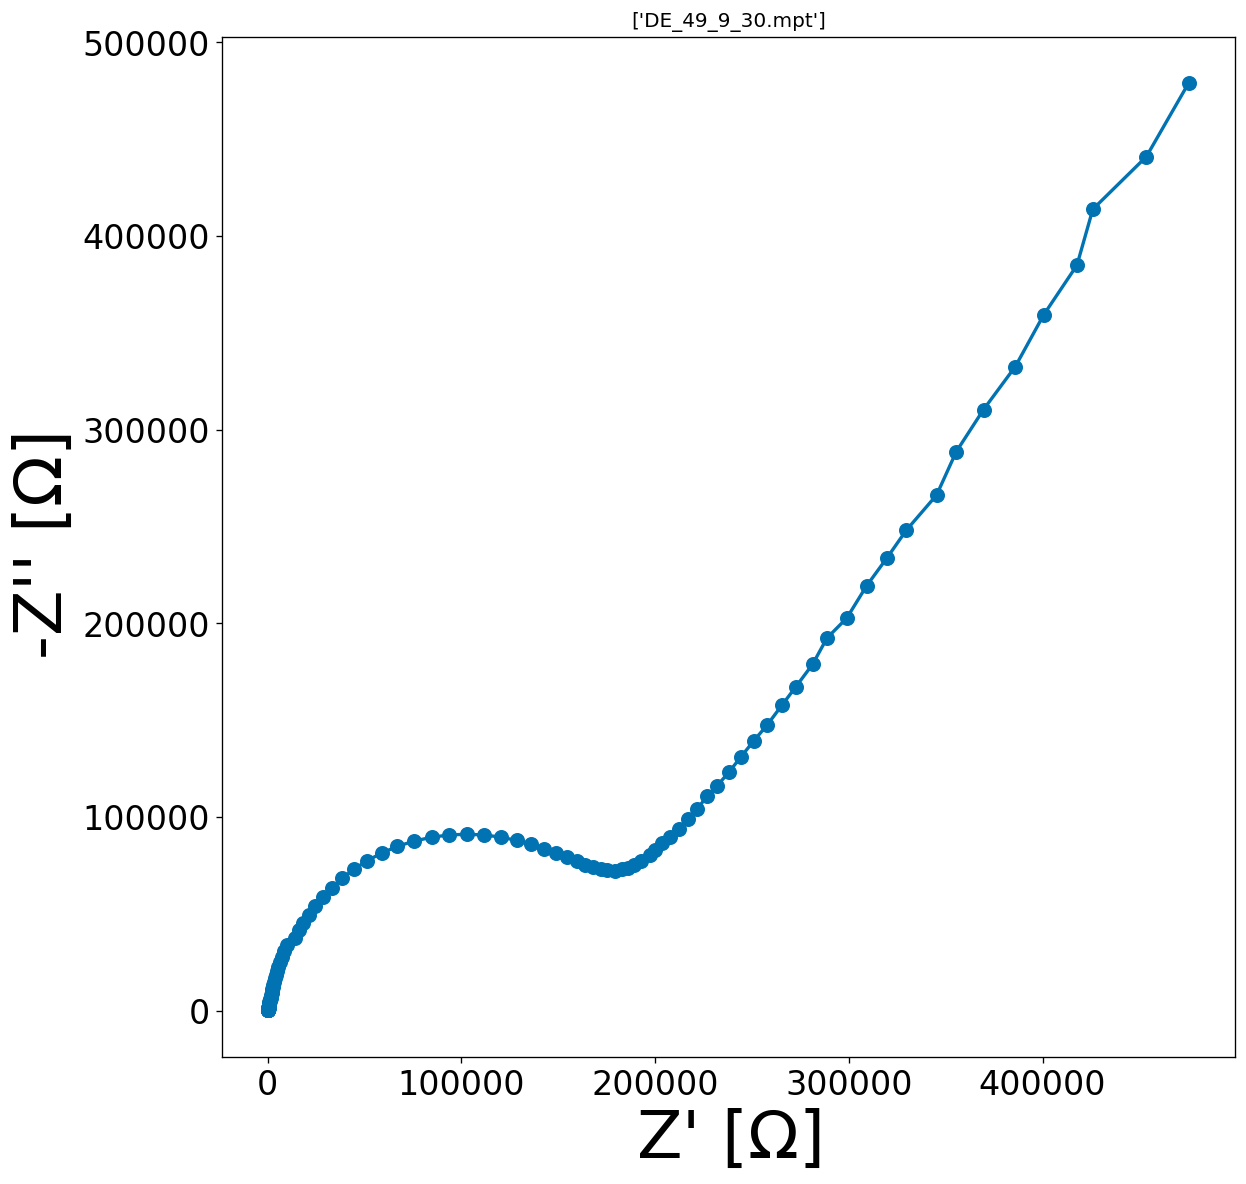

In [2]:
#SCRIPT TO TEST AND DEBUG SPEEDS
from tools import *
import IPython
mpt = mpt_data(data = ['DE_49_9_30.mpt'])
masked_mpt = mpt_data(data = ['copy.mpt'], mask = mpt.fast_mask())
mpt.mpt_plot()

running on  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
CHI-SQ ERROR:  19519194673.739037
CHI-SQ ERROR:  19243298666.36273
CHI-SQ ERROR:  106392.79508177427
CHI-SQ ERROR:  41878313952.46704
CHI-SQ ERROR:  106393.23660134144
CHI-SQ ERROR:  1.1095772014093677e+19
CHI-SQ ERROR:  106395.03082189537
CHI-SQ ERROR:  19634763836.814964
CHI-SQ ERROR:  19521137183.406868
CHI-SQ ERROR:  106392.79702355058
CHI-SQ ERROR:  42141778195.58327
CHI-SQ ERROR:  42119657580.94472
CHI-SQ ERROR:  42221349449.94992
CHI-SQ ERROR:  1.3141500153986445e+19
CHI-SQ ERROR:  5.250748988399672e+18
CHI-SQ ERROR:  19753677582.509167
CHI-SQ ERROR:  2.2402490721008102e+18
CHI-SQ ERROR:  19520569504.17131
CHI-SQ ERROR:  3.2063839115629455e+18
No handles with labels found to put in legend.
CHI-SQ ERROR:  41263848373.361946
CHI-SQ ERROR:  106392.79508177427
time to calculate:  21.795331239700317  seconds


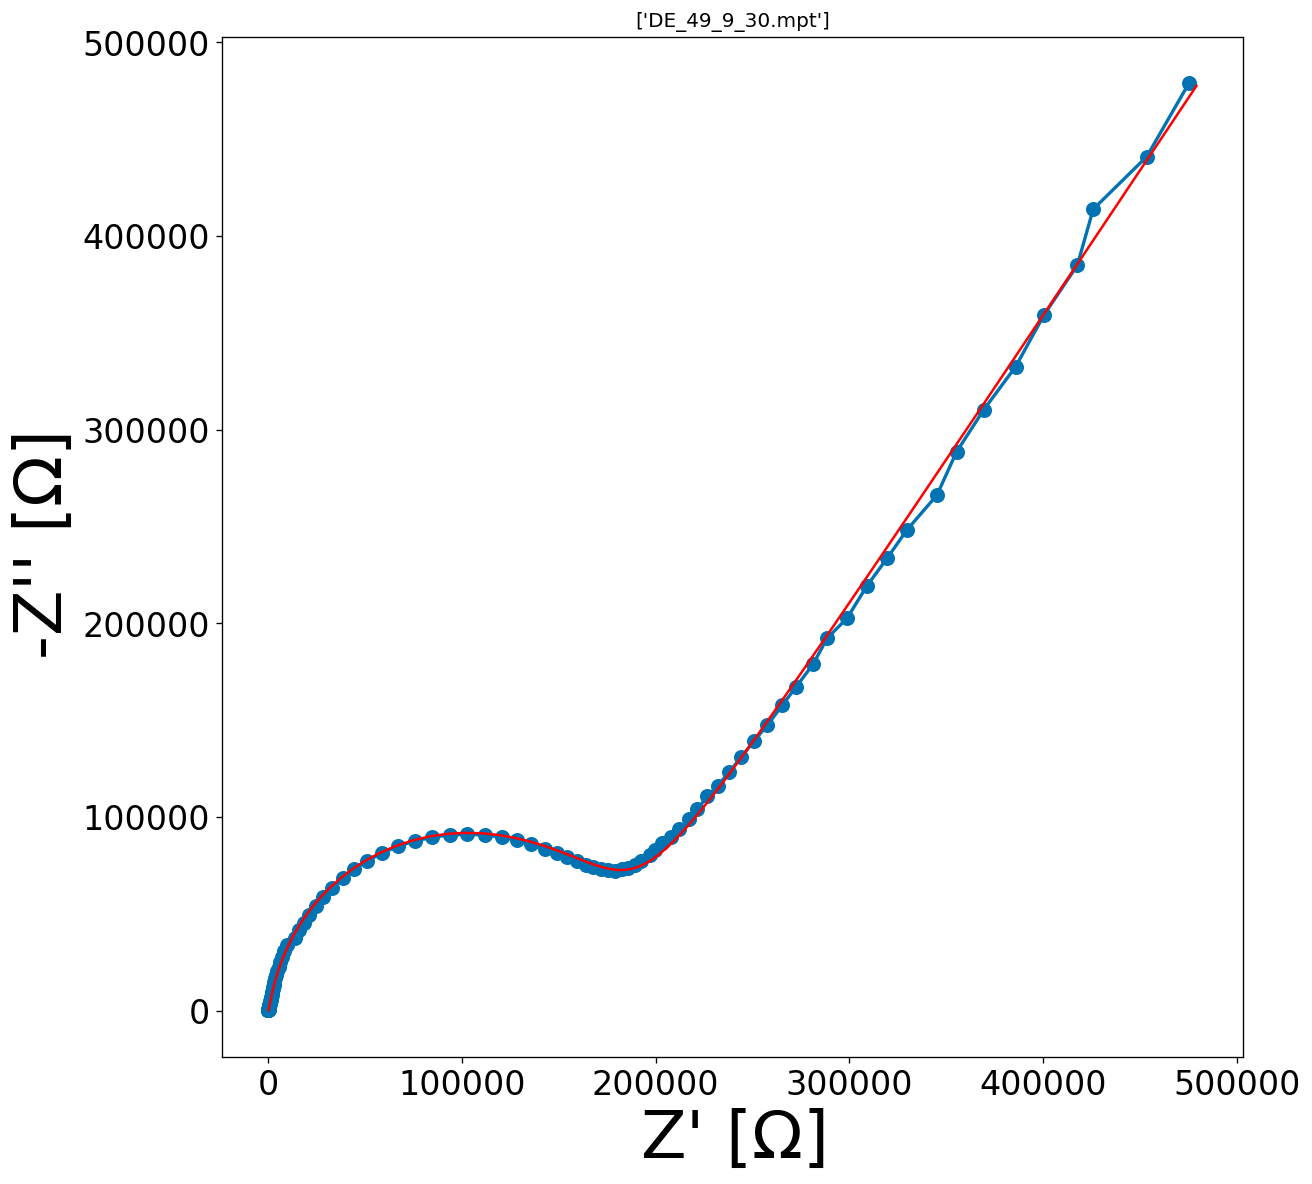

,file,fit_Rs,fit_R1,fit_n1,fit_Q1,fit_n2,fit_Q2
0,DE_49_9_30.mpt,0.03303,161868.37098,0.625998,3.335356e-07,0.962475,2.333915e-09


In [3]:
mpt.guesser(circuit = 'R-RQ-Q', no_of_fits= 20)

In [33]:
for i in range(30):
    Rs_guess = min(masked_mpt.df[0]['re'])
    R1_guess = max(masked_mpt.df[0]['re'])//4
    n1_guess = random.uniform(0, 1)
    q1_guess = random.uniform(0, .001)
    #R2_guess = 2*max(self.df[0]['re'])//4
    n2_guess = random.uniform(0, 1)
    q2_guess = random.uniform(0, .001)
    #Q3_guess = random.uniform(0, .001)
    #n3_guess = random.uniform(0, 1)
    params = Parameters()
    params.add('Rs', value=Rs_guess, min=Rs_guess*.001, max=Rs_guess*10)
    params.add('R1', value=R1_guess, min=R1_guess*.001, max=R1_guess*10)
    params.add('n', value=n1_guess, min=0, max=1)
    #params.add('fs1', value=fs1_guess, min=10**-2, max=10**10)
    params.add('Q', value=q1_guess, min=0, max=.001)
    #params.add('R2', value=R2_guess, min=R2_guess*.001, max=R2_guess*10)
    params.add('n1', value=n2_guess, min=.01, max=1)
    #params.add('fs2', value=fs2_guess, min=fs2_guess**.1, max=10**10)
    params.add('Q1', value=q2_guess, min=0, max=.001)
    print(minimize(masked_mpt.leastsq_errorfunc, params, method='leastsq', args=(masked_mpt.df[0].w.values, masked_mpt.df[0].re.values, masked_mpt.df[0].im.values, "R-RQ-Q", 'modulus'), nan_policy="raise", maxfev=100).chisqr)

959530.355662234
3818644357.361226
959520.5911834056
959519.9076338755
4150917180158.837
1442905.4905748018
1442905.8597654167
959513.9905078541
1442905.5055547138
6558580171.064829
16499453942.387087
34149649128.093685
1442905.535577749
1442933.555853107
959519.2285932399
1442910.3481793436
5100991072.525562
959513.8630479092
4140861657.0079503
20484959060.474304
1442905.5001414237
959513.372925132
5148495395.300667
959513.5198435017
1442912.00272581
1442905.540678442
959517.1080031802
1442905.502542138
959513.3842235815
449709442559.2033


No handles with labels found to put in legend.


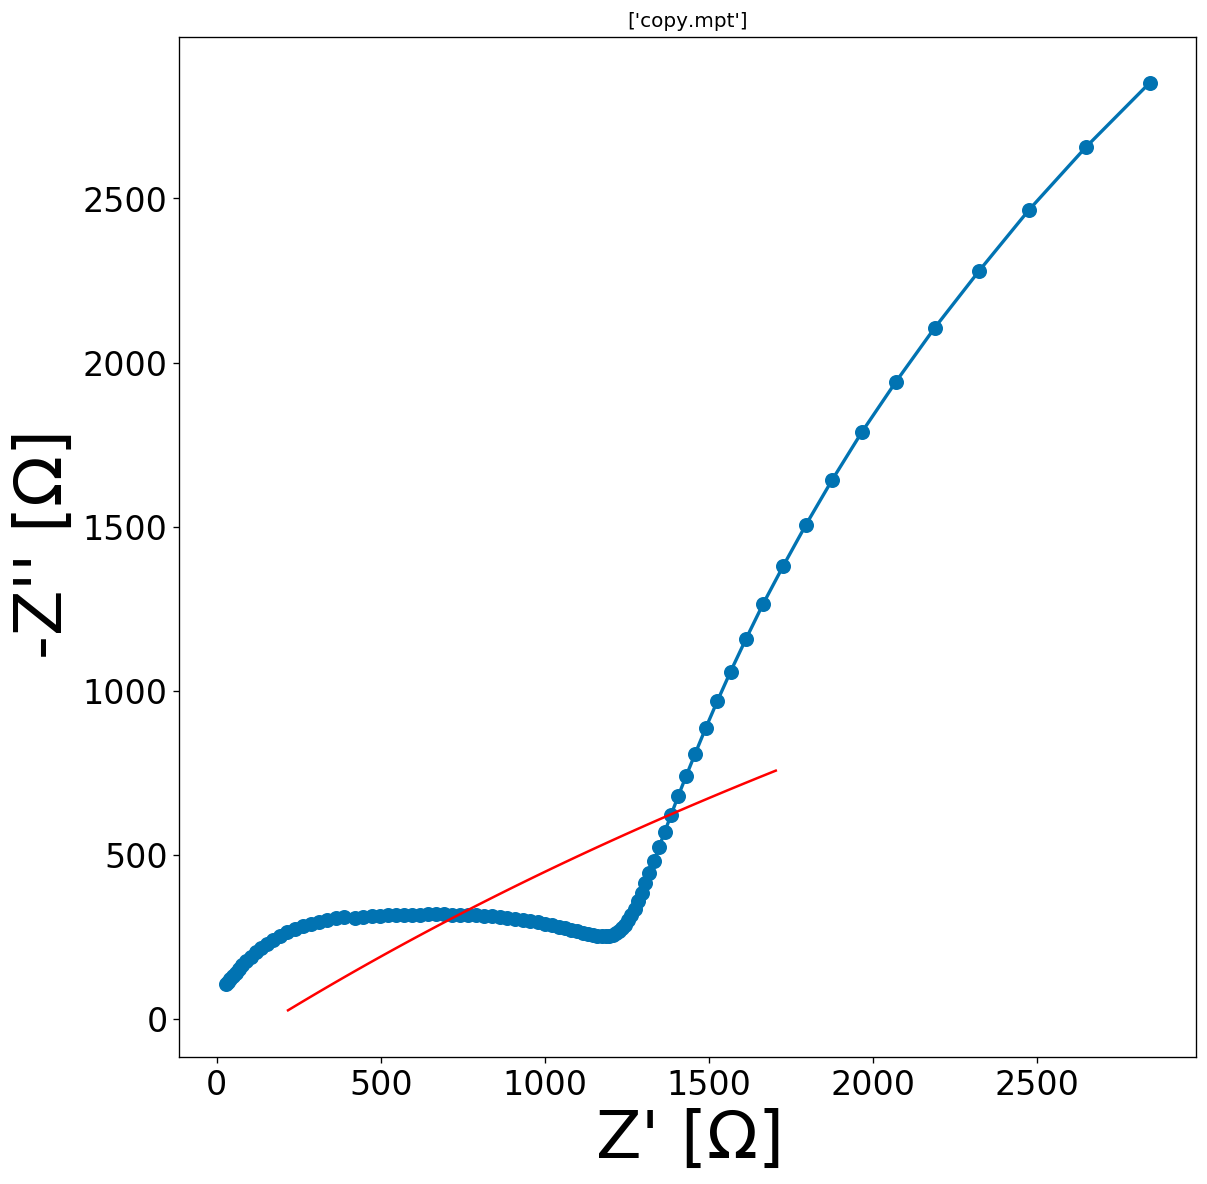

In [11]:
masked_mpt.mpt_plot(fitting = "on")